In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\blob.csv')

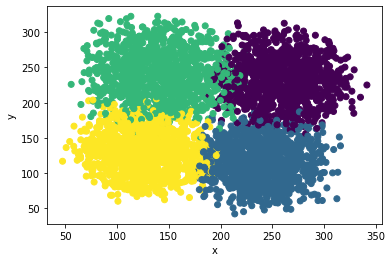

In [3]:
color=['blue','green','cyan','yellow']
plt.scatter(df['x'],df['y'], c=df['color'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [4]:
df['color'].value_counts()

3    1055
2    1045
1    1019
0     967
Name: color, dtype: int64

In [5]:
df.drop(['color'], axis=1, inplace=True)

In [6]:
df.head()

,x,y
0,199.115034,72.641121
1,196.880523,247.744708
2,88.426271,233.962425
3,118.578789,264.044188
4,249.572490,260.896521


In [7]:
df.tail()

,x,y
4081,124.085168,168.807922
4082,243.835577,216.936490
4083,226.728155,136.945680
4084,225.831882,95.884561
4085,95.551361,182.679353


In [8]:
df.describe()

,x,y
count,4086.000000,4086.000000
mean,189.870723,178.623157
std,65.401912,64.963358
min,47.191786,42.115898
25%,132.253424,123.035327
50%,190.950023,174.867601
75%,245.826004,234.976024
max,341.567130,322.741088


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4086 non-null   float64
 1   y       4086 non-null   float64
dtypes: float64(2)
memory usage: 64.0 KB


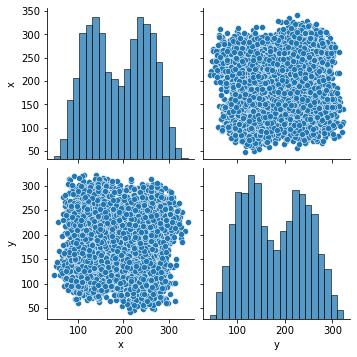

In [10]:
sns.pairplot(data=df)

In [11]:
df_norm = (df-df.min())/(df.max()-df.min())

In [12]:
df_norm

,x,y
0,0.516087,0.108776
1,0.508496,0.732753
2,0.140075,0.683640
3,0.242503,0.790835
4,0.687492,0.779619
...,...,...
4081,0.261209,0.451463
4082,0.668004,0.622968
4083,0.609889,0.337923
4084,0.606845,0.191603


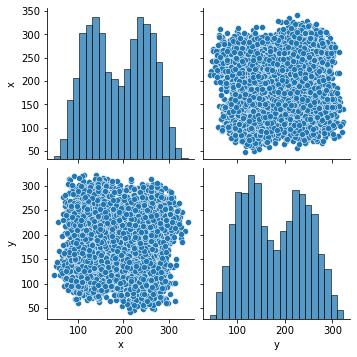

In [13]:
sns.pairplot(data=df)

In [14]:
centers = df.sample(4)

In [15]:
centers

,x,y
2350,133.817260,260.686753
2967,117.618878,144.681869
3742,122.138121,205.253790
2131,195.015114,89.750827


In [16]:
distances = np.zeros((len(df.index),4))

In [17]:
distances

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [18]:
for i in range(4):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

array([[199.06018941, 108.77266568, 153.33481361,  17.59407241],
       [ 64.37757169, 130.0167578 ,  85.97618777, 158.00489344],
       [ 52.67382204,  93.93202836,  44.27950464, 179.32698136],
       ...,
       [154.7394183 , 109.38319264, 124.9202666 ,  56.86010105],
       [188.74971018, 118.70649299, 150.71172559,  31.42126544],
       [ 86.88747567,  43.94068882,  34.87780113, 136.12034793]])

In [19]:
closest = np.argmin(distances, axis = 1)

In [20]:
closest

array([3, 0, 2, ..., 3, 3, 2], dtype=int64)

In [21]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

               x           y
2350  202.409245  255.202666
2967  117.618878  144.681869
3742  122.138121  205.253790
2131  195.015114   89.750827
               x           y
2350  202.409245  255.202666
2967  118.752127  131.231175
3742  122.138121  205.253790
2131  195.015114   89.750827
               x           y
2350  202.409245  255.202666
2967  118.752127  131.231175
3742  146.624497  204.365977
2131  195.015114   89.750827
               x           y
2350  202.409245  255.202666
2967  118.752127  131.231175
3742  146.624497  204.365977
2131  237.493841  127.261142


In [22]:
centers

,x,y
2350,202.409245,255.202666
2967,118.752127,131.231175
3742,146.624497,204.365977
2131,237.493841,127.261142


In [23]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(4)
distances = np.zeros((len(df.index),4))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(4):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

[3 0 2 ... 3 3 2]
               x           y
560   172.006010  257.525737
348   223.852936   86.691733
3760  244.393341  172.655932
3961  121.027780  137.655664
[1 0 0 ... 2 1 3]
               x           y
560   166.208027  252.315503
348   232.298559   99.705541
3760  258.855859  196.698337
3961  122.655176  139.483515
[1 0 0 ... 2 1 3]
               x           y
560   153.847644  249.090578
348   234.870636  107.909411
3760  262.479894  217.908616
3961  123.558993  137.639813
[1 0 0 ... 1 1 3]
               x           y
560   145.573580  246.056083
348   236.631741  112.010607
3760  260.270094  228.102671
3961  124.131362  135.304310
[1 0 0 ... 1 1 3]
               x           y
560   142.569758  244.302804
348   237.302671  113.970515
3760  258.823616  231.342820
3961  124.352672  133.574671
[1 0 0 ... 1 1 3]
               x           y
560   141.059594  243.698504
348   237.819187  114.853436
3760  257.726241  232.609681
3961  124.601622  132.860832
[1 0 0 ... 1 1 3]
    

In [24]:
closest

array([1, 0, 0, ..., 1, 1, 3], dtype=int64)

In [25]:
df['color'] = closest.tolist()

In [26]:
df

,x,y,color
0,199.115034,72.641121,1
1,196.880523,247.744708,0
2,88.426271,233.962425,0
3,118.578789,264.044188,0
4,249.572490,260.896521,2
...,...,...,...
4081,124.085168,168.807922,3
4082,243.835577,216.936490,2
4083,226.728155,136.945680,1
4084,225.831882,95.884561,1


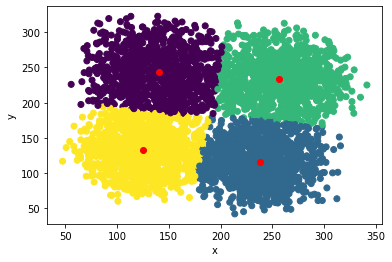

In [27]:
color=['blue','green','cyan','yellow']
plt.scatter(df['x'],df['y'], c=closest)
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
